In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm


In [3]:
data=pd.read_excel('dem2.xlsx',engine='openpyxl')
data['NTLBIN'] = data['N TL'].apply(lambda x:0 if x==0 else 1)

In [4]:
#data.to_csv('DATAdem2.csv',index=False)
data.head()

,Table Centrale.COM,N TL,REG,D,AR,PCT,Base de données communales du recensement de la population 2020.COM,NCC,MODC99XX,PTOT18,...,EPCI,LIB_EPCI,NATURE_EPCI,LIB_CV,LIB_ARR,LIB_UU2010,TYPE_UU2010,LIB_TYPO_AU2010,LIB_ZE2010,NTLBIN
0,16001,0,75,16,3,10,16001,Abzac,*,494,...,200072049,CC de Charente Limousine,CC,Charente-Vienne,Confolens,Communes rurales du département 16,0,Commune isolée hors influence des pôles,Angoulême,0
1,16002,0,75,16,3,8,16002,Adjots,*,530,...,200043016,CC Val de Charente,CC,Charente-Nord,Confolens,Communes rurales du département 16,0,Commune appartenant à la couronne d'un petit pôle,Angoulême,0
2,16003,0,75,16,1,19,16003,Agris,*,864,...,200068914,CC La Rochefoucauld - Porte du Périgord,CC,Val de Tardoire,Angoulême,Communes rurales du département 16,0,Commune appartenant à la couronne d'un grand pôle,Angoulême,0
3,16005,0,75,16,3,8,16005,Aigre,2,1624,...,200072023,CC CSur de Charente,CC,Charente-Nord,Confolens,Communes rurales du département 16,0,Commune isolée hors influence des pôles,Angoulême,0
4,16007,0,75,16,3,6,16007,Alloue,*,476,...,200072049,CC de Charente Limousine,CC,Charente-Bonnieure,Confolens,Communes rurales du département 16,0,Commune isolée hors influence des pôles,Angoulême,0


In [5]:
data=data.drop('N TL',axis=1)

In [6]:


new_data = data.select_dtypes(exclude=['object'])



In [7]:
#new_data=new_data.drop(columns='Table Centrale.COM',axis=1)
#new_data=new_data.drop('REG',axis=1)
#new_data=new_data.drop(columns='D',axis=1)
#new_data=new_data.drop(columns='Base de données communales du recensement de la population 2020.COM',axis=1)
new_data.head()
data=new_data


In [8]:
#numerical_data = data.select_dtypes(exclude=['object'])
correlations = data.corr()['NTLBIN']
#print(correlations)
threshold = -0.3  # Remplacez par le seuil de votre choix

# Filtrer les corrélations supérieures au seuil
filtered_correlations = correlations[correlations.abs() > threshold]

# Afficher les corrélations filtrées
print("\nCorrélations supérieures à", threshold, ":")
print(filtered_correlations)


Corrélations supérieures à -0.3 :
Table Centrale.COM                                                     0.018353
D                                                                      0.018292
AR                                                                     0.003371
PCT                                                                    0.200148
Base de données communales du recensement de la population 2020.COM    0.018353
                                                                         ...   
UU2010                                                                -0.003734
ZE2010                                                                 0.042061
EPCI                                                                   0.059996
TYPE_UU2010                                                            0.197765
NTLBIN                                                                 1.000000
Name: NTLBIN, Length: 108, dtype: float64


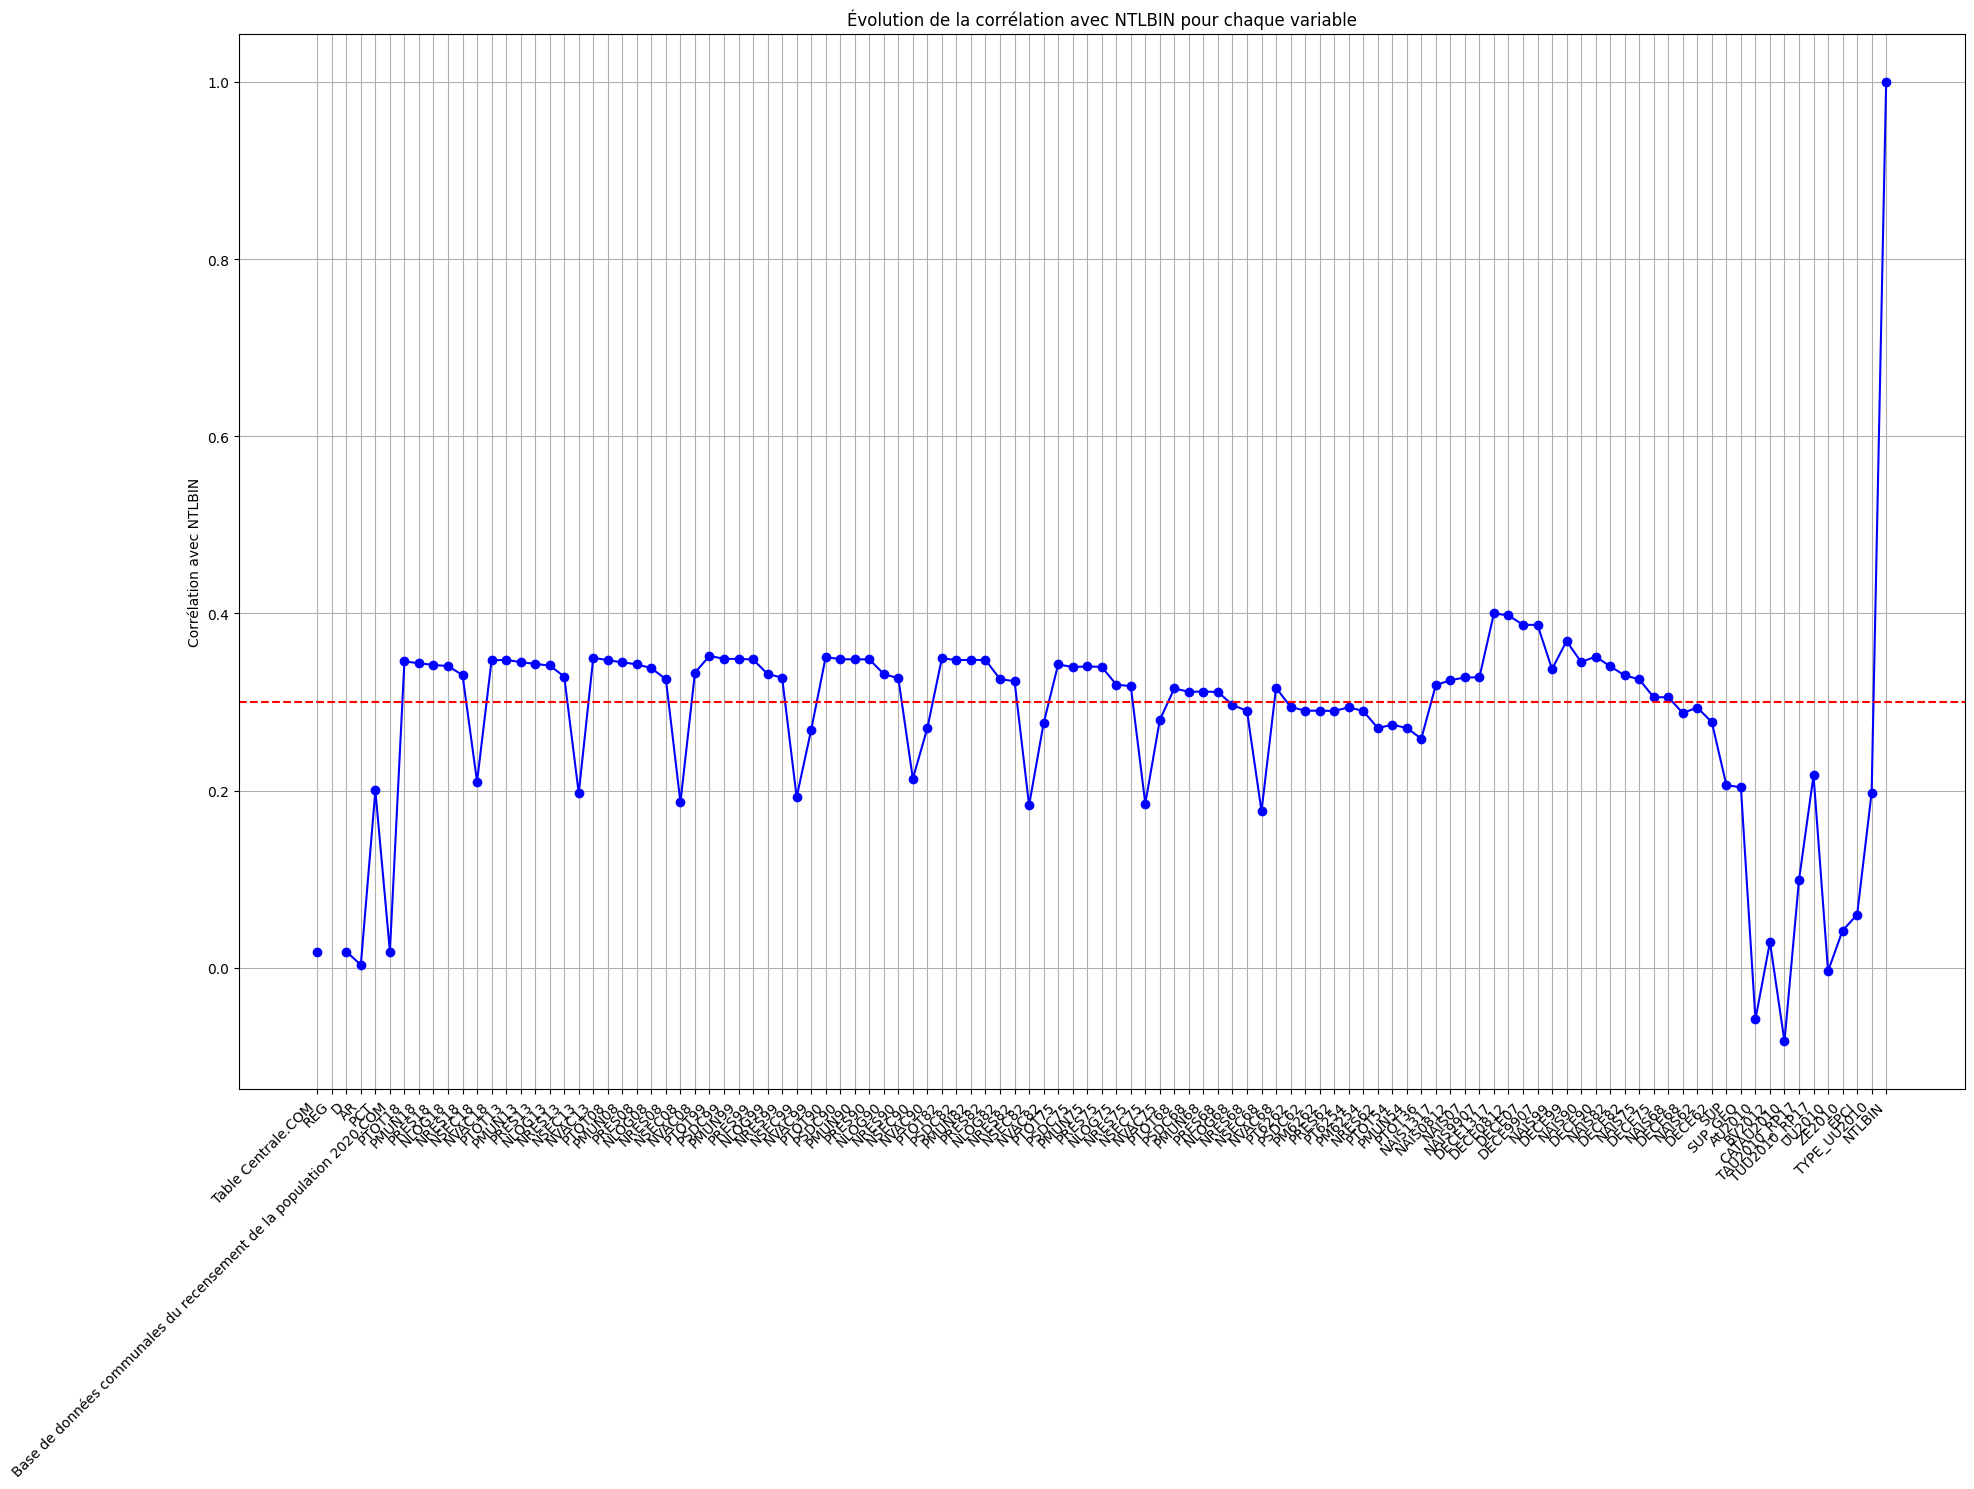

In [9]:
plt.figure(figsize=(20, 15))
plt.plot(correlations.index, correlations.values, color='blue', marker='o')
plt.axhline(y=0.3,color='r',linestyle='--')
plt.ylabel('Corrélation avec NTLBIN')
plt.title('Évolution de la corrélation avec NTLBIN pour chaque variable')
plt.grid(True)
plt.xticks(ticks=correlations.index, labels=correlations.index,ha='right',rotation=45)
plt.tight_layout()
plt.show()


In [10]:
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

'''
# Définition de la fonction pour calculer le VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Initialisation de X avec vos données (en supprimant la variable cible)
X = data.drop(columns=['NTLBIN'])

# Calcul des VIF initiaux
vif_data = calculate_vif(X)
print("VIF initiaux:")
print(vif_data)

# Seuil initial pour le VIF élevé
high_vif_threshold = 10



# Si le nombre de variables restantes est <= 100, supprimer une par une

while vif_data['VIF'].max() > high_vif_threshold:
    max_vif_variable = vif_data.sort_values('VIF', ascending=False)['Variable'].iloc[0]
    print(f'Suppression de la variable avec le VIF le plus élevé: {max_vif_variable}')
    X = X.drop(columns=[max_vif_variable])
    vif_data = calculate_vif(X)
    print(vif_data)

print('Variables restantes après suppression des variables à forte multicolinéarité:')
print(X.columns)

'''


'\n# Définition de la fonction pour calculer le VIF\ndef calculate_vif(X):\n    vif_data = pd.DataFrame()\n    vif_data["Variable"] = X.columns\n    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]\n    return vif_data\n\n# Initialisation de X avec vos données (en supprimant la variable cible)\nX = data.drop(columns=[\'NTLBIN\'])\n\n# Calcul des VIF initiaux\nvif_data = calculate_vif(X)\nprint("VIF initiaux:")\nprint(vif_data)\n\n# Seuil initial pour le VIF élevé\nhigh_vif_threshold = 10\n\n\n\n# Si le nombre de variables restantes est <= 100, supprimer une par une\n\nwhile vif_data[\'VIF\'].max() > high_vif_threshold:\n    max_vif_variable = vif_data.sort_values(\'VIF\', ascending=False)[\'Variable\'].iloc[0]\n    print(f\'Suppression de la variable avec le VIF le plus élevé: {max_vif_variable}\')\n    X = X.drop(columns=[max_vif_variable])\n    vif_data = calculate_vif(X)\n    print(vif_data)\n\nprint(\'Variables restantes après suppression des va

In [11]:







X = data[['PCT','NVAC18','SUP_GEO','AU2010','CATAU2010','TAU2010_RP17']]

y = data['NTLBIN']

# Séparer les données en ensembles d'entraînement et de test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = sm.Logit(y, X)
result = log_reg.fit()

# Afficher le résumé du modèle
print(result.summary())

"""
PCT             -0.0193      0.008     -2.397      0.017      -0.035      -0.004
NVAC18           0.0056      0.000     11.368      0.000       0.005       0.007
SUP_GEO          0.0002   2.63e-05      6.377      0.000       0.000       0.000
AU2010          -0.0022      0.000     -9.169      0.000      -0.003      -0.002
CATAU2010       -0.0100      0.000    -20.114      0.000      -0.011      -0.009
TAU2010_RP17
"""

Optimization terminated successfully.
         Current function value: 0.142278
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 NTLBIN   No. Observations:                 4309
Model:                          Logit   Df Residuals:                     4303
Method:                           MLE   Df Model:                            5
Date:                Mon, 24 Jun 2024   Pseudo R-squ.:                  0.2280
Time:                        16:10:32   Log-Likelihood:                -613.08
converged:                       True   LL-Null:                       -794.13
Covariance Type:            nonrobust   LLR p-value:                 4.313e-76
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
PCT             -0.0193      0.008     -2.397      0.017      -0.035      -0.004
NVAC18           0.0056

'\nPCT             -0.0193      0.008     -2.397      0.017      -0.035      -0.004\nNVAC18           0.0056      0.000     11.368      0.000       0.005       0.007\nSUP_GEO          0.0002   2.63e-05      6.377      0.000       0.000       0.000\nAU2010          -0.0022      0.000     -9.169      0.000      -0.003      -0.002\nCATAU2010       -0.0100      0.000    -20.114      0.000      -0.011      -0.009\nTAU2010_RP17\n'

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg=LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = log_reg.predict(X_test)

# Afficher les résultatsa
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[821   5]
 [ 25  11]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       826
           1       0.69      0.31      0.42        36

    accuracy                           0.97       862
   macro avg       0.83      0.65      0.70       862
weighted avg       0.96      0.97      0.96       862


Accuracy Score:
0.9651972157772621


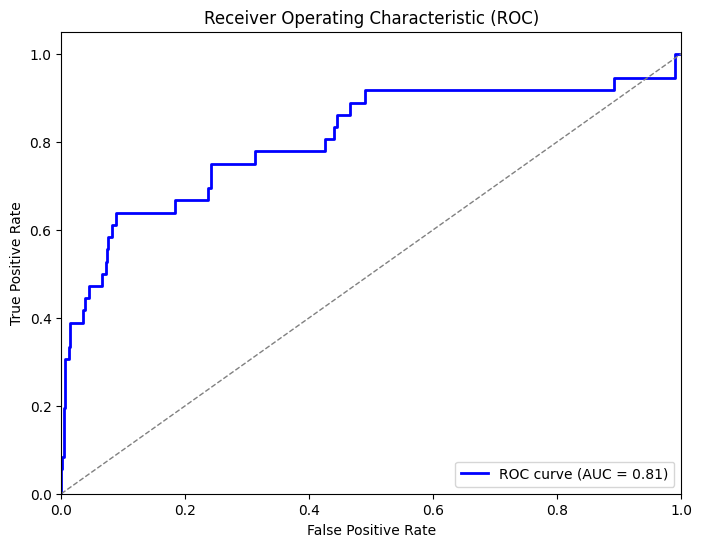

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score
model = LogisticRegression()

# Entraînez le modèle sur l'ensemble d'apprentissage
model.fit(X_train, y_train)

# Prédisez les probabilités des classes pour l'ensemble de test
y_probs = model.predict_proba(X_test)[:, 1]

# Calculez la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc_roc = roc_auc_score(y_test, y_probs)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [14]:
from sklearn.utils import resample

df_majority = data.loc[data.NTLBIN == 0].copy()
df_minority = data.loc[data.NTLBIN == 1].copy()

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                             replace=True,  # sample with replacement
                             n_samples=4113,  # to match majority class
                             random_state=123)  # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
print(df_upsampled.NTLBIN.value_counts())

NTLBIN
0    4114
1    4113
Name: count, dtype: int64


In [15]:
X=df_upsampled[['PCT','NVAC18','SUP_GEO','AU2010','CATAU2010','TAU2010_RP17']]
#X.drop('COM',axis=1)
#X.drop('NTLBIN',axis=1)
y = df_upsampled['NTLBIN']

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = sm.Logit(y, X)
result = log_reg.fit()

# Afficher le résumé du modèle
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.480267
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 NTLBIN   No. Observations:                 8227
Model:                          Logit   Df Residuals:                     8221
Method:                           MLE   Df Model:                            5
Date:                Mon, 24 Jun 2024   Pseudo R-squ.:                  0.3071
Time:                        16:11:53   Log-Likelihood:                -3951.2
converged:                       True   LL-Null:                       -5702.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
PCT             -0.0005      0.004     -0.153      0.878      -0.008       0.006
NVAC18           0.0098

In [16]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


log_reg=LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = log_reg.predict(X_test)

# Afficher les résultatsa
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[734  83]
 [287 542]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       817
           1       0.87      0.65      0.75       829

    accuracy                           0.78      1646
   macro avg       0.79      0.78      0.77      1646
weighted avg       0.79      0.78      0.77      1646


Accuracy Score:
0.7752126366950183


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


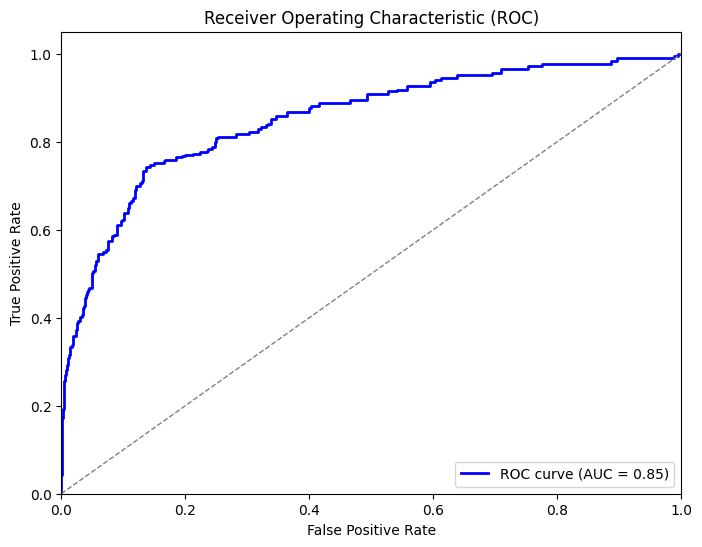

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score
model = LogisticRegression()

# Entraînez le modèle sur l'ensemble d'apprentissage
model.fit(X_train, y_train)

# Prédisez les probabilités des classes pour l'ensemble de test
y_probs = model.predict_proba(X_test)[:, 1]

# Calculez la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc_roc = roc_auc_score(y_test, y_probs)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Adapter le scaler aux données d'entraînement et transformer les données d'entraînement
X_train_scaled = scaler.fit_transform(X_train)

# Transformer les données de test en utilisant le scaler adapté aux données d'entraînement
X_test_scaled = scaler.transform(X_test)# Supposons que 'model' est votre modèle déjà entraîné
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Prédire sur les données de test
y_pred = model.predict(X_test_scaled)
scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='f1')

print("Scores de F1 après validation croisée : ", scores)
print("Moyenne du F1 Score : ", scores.mean())


Scores de F1 après validation croisée :  [0.76831346 0.77092139 0.74806535 0.75867909 0.78571429]
Moyenne du F1 Score :  0.76633871280814
